## Description

The purpose of this simulation is to test the robustness of the method under missing data.

Two desired experiments:
- sample equal numbers of sensors in the northern and southern hemisphere
- systematically remove data from each station so that the observations are not periodic.

How can we accomplish the latter? Try simply removing 3/4 of the observations, contiguous. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import topological analysis functions

In [3]:
import os 
import sys
sys.path.append('../data/NOAA_Temperature/')

In [4]:
sys.executable

'/Users/timothysudijono/anaconda3/envs/mypython3/bin/python3'

In [5]:
all_stations = set()

for year in [2016,2017,2018,2019]:
    data_path = '/Users/timothysudijono/projects/Research/dynamic_networks/data/NOAA_Temperature/%s/' % year
    stations = set([x.split('.')[0] for x in os.listdir(data_path)])
    all_stations = all_stations.union(stations)

    
    
STATION_LIST = sorted(list(all_stations))
STATION_LIST = [str(x) + '.csv' for x in STATION_LIST]

In [6]:
def getYearData(year):
    
    data_path = '/Users/timothysudijono/projects/Research/dynamic_networks/data/NOAA_Temperature/%s/' % year
    full_data = pd.DataFrame(index = pd.date_range('01-01-%s'%year,'12-31-%s'%year))
    location_map = {}

    for station in STATION_LIST:
        #print('Analyzing Station %s'%station)
        try:
            df = pd.read_csv(data_path + station)
            temps = df.set_index('DATE').loc[:,['TEMP']]
            temps.index = pd.to_datetime(temps.index) ### important here.
            location = df.loc[:,['LATITUDE','LONGITUDE']].mean(skipna = True).values

            station_number = station.split('.')[0]

            location_map[station_number] = location
            full_data['%s'%station_number] = temps.TEMP
        except FileNotFoundError:
            
            station_number = station.split('.')[0]
            full_data['%s'%station_number] = np.nan
        
    return full_data, location_map

In [7]:
year_aggregated_data = pd.DataFrame()
locations = {}
for year in [2016,2017,2018,2019]:
    print(year)
    temp_data, location_map = getYearData(year)
    year_aggregated_data = year_aggregated_data.append(temp_data)
    locations.update(location_map)

2016
2017
2018
2019


In [8]:
year_aggregated_data.shape

(1461, 13476)

In [9]:
year_aggregated_data

,00702699999,00841199999,00841499999,00841599999,00841899999,01001099999,01001499999,01002099999,01003099999,01006099999,...,99999994644,99999994645,99999994995,99999994996,99999996404,99999996405,99999996406,99999996407,99999996408,99999996409
2016-01-01,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,37.9,36.1,...,32.1,22.5,23.3,23.9,20.9,NaN,NaN,30.4,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,36.8,36.2,...,28.0,22.8,25.5,27.3,9.0,NaN,NaN,27.9,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,33.0,30.4,NaN,36.4,36.8,...,32.1,25.0,25.0,27.1,19.9,NaN,NaN,32.0,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,35.0,27.6,NaN,30.7,29.3,...,19.2,8.5,19.0,18.9,9.8,NaN,NaN,30.3,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,34.6,28.8,NaN,22.6,23.6,...,4.7,-3.0,26.0,25.8,-9.4,NaN,NaN,30.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN,NaN,32.5,38.7,19.5,25.3,18.4,...,20.9,12.2,25.8,27.5,-23.6,NaN,-52.9,-27.4,-26.9,-26.0
2019-12-28,NaN,NaN,NaN,NaN,NaN,33.6,NaN,20.8,24.0,13.3,...,36.2,31.4,38.0,37.3,-23.3,NaN,-50.9,-26.6,-24.5,-32.5
2019-12-29,NaN,NaN,NaN,NaN,NaN,27.7,46.4,18.5,20.1,10.1,...,29.3,26.6,34.0,32.9,-23.0,NaN,-9.7,-30.9,-19.7,-26.3
2019-12-30,NaN,NaN,NaN,NaN,NaN,26.2,43.5,9.8,12.2,-5.7,...,25.5,17.8,27.3,27.2,-13.9,NaN,-0.8,-7.7,-5.4,-22.4


## Visualize dynamic network? On globe / picture of the US

Text(0.5, 1.0, 'Distribution of stations by missing days')

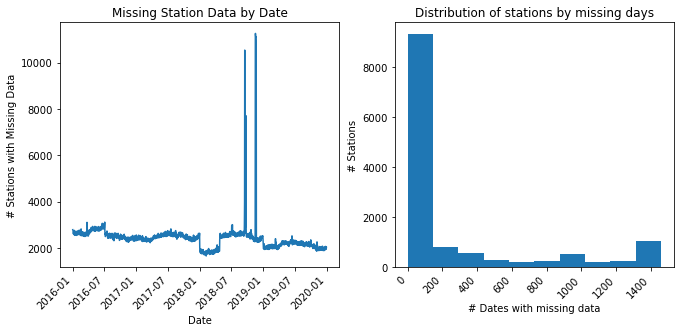

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,5))
ax1.plot(year_aggregated_data.isna().sum(axis = 1))
ax1.set_ylabel('# Stations with Missing Data')
ax1.set_xlabel('Date')
ax1.set_title('Missing Station Data by Date')
fig.autofmt_xdate(rotation=45)
## There's no data for 2018? - all good. DateTime Index issues.

ax2.hist(year_aggregated_data.isna().sum(axis = 0))
ax2.set_xlabel('# Dates with missing data')
ax2.set_ylabel('# Stations')
ax2.set_title('Distribution of stations by missing days')

## Data visualization

In [11]:
%matplotlib inline

In [12]:
print(year_aggregated_data.shape)

(1461, 13476)


In [13]:
#year_aggregated_data.fillna(0).mean(axis = 1).plot()

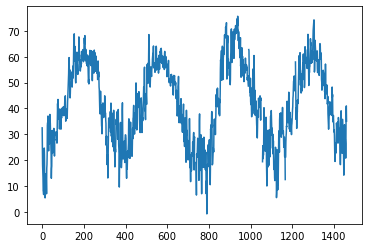

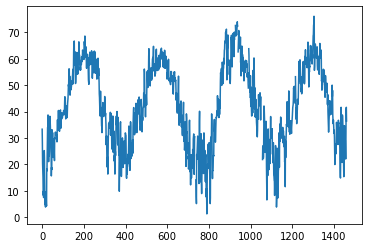

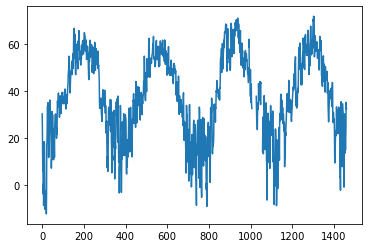

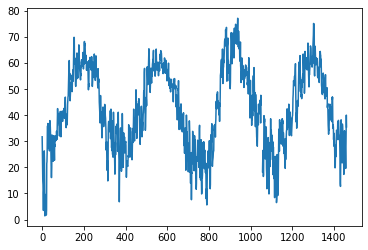

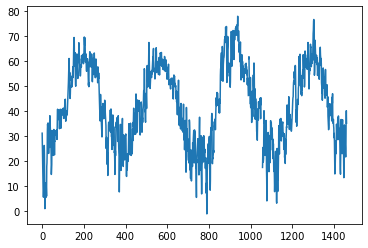

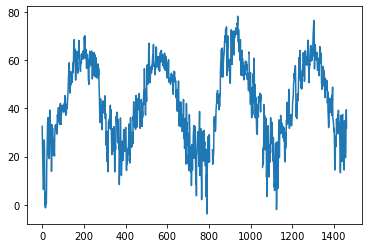

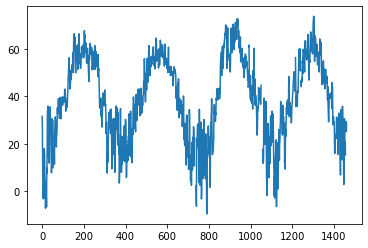

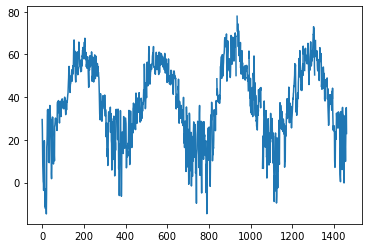

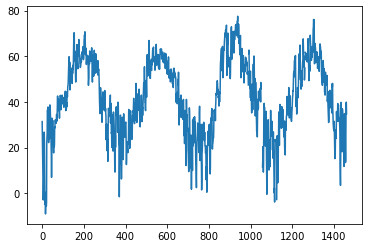

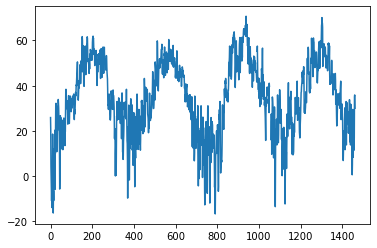

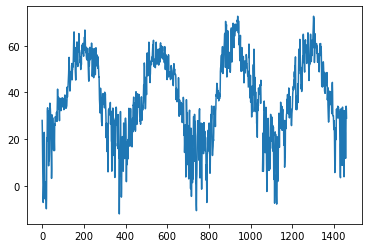

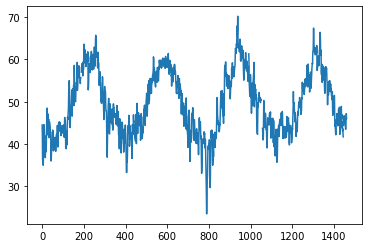

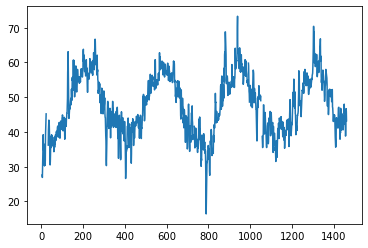

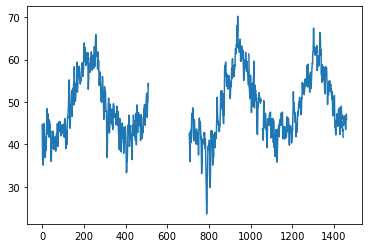

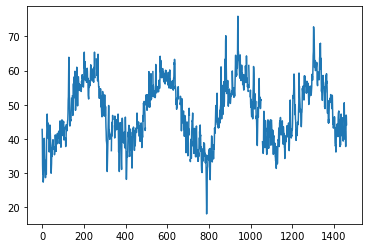

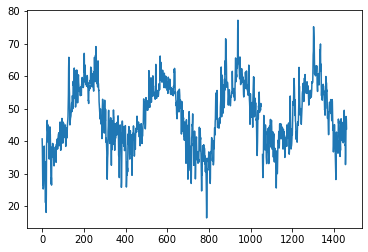

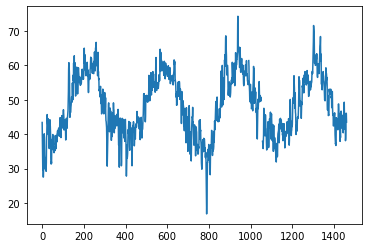

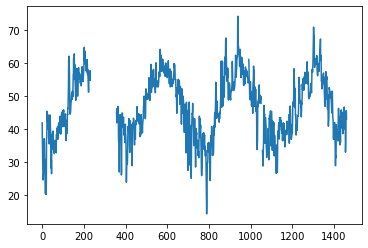

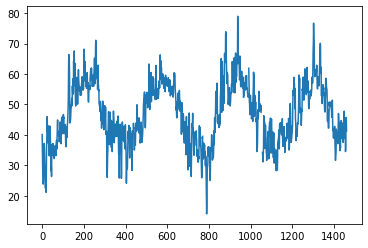

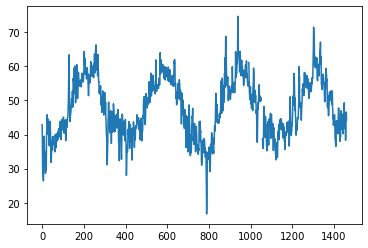

In [14]:
import matplotlib.pyplot as plt
for i in range(200,220):
    plt.plot(year_aggregated_data.iloc[:,i].values)
    plt.show()
    


In [15]:
year_aggregated_data.head()

,00702699999,00841199999,00841499999,00841599999,00841899999,01001099999,01001499999,01002099999,01003099999,01006099999,...,99999994644,99999994645,99999994995,99999994996,99999996404,99999996405,99999996406,99999996407,99999996408,99999996409
2016-01-01,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,37.9,36.1,...,32.1,22.5,23.3,23.9,20.9,NaN,NaN,30.4,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,36.8,36.2,...,28.0,22.8,25.5,27.3,9.0,NaN,NaN,27.9,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,33.0,30.4,NaN,36.4,36.8,...,32.1,25.0,25.0,27.1,19.9,NaN,NaN,32.0,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,35.0,27.6,NaN,30.7,29.3,...,19.2,8.5,19.0,18.9,9.8,NaN,NaN,30.3,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,34.6,28.8,NaN,22.6,23.6,...,4.7,-3.0,26.0,25.8,-9.4,NaN,NaN,30.4,NaN,NaN


In [16]:
## plot the locations on the sphere

In [17]:
# locations with nan?
locations = pd.DataFrame(locations).T
locations.columns = ['LAT','LONG']

locations.head()


,LAT,LONG
00702699999,0.0,0.0
00841199999,NaN,NaN
00841499999,NaN,NaN
00841599999,NaN,NaN
00841899999,NaN,NaN


In [18]:
has_loc_stations = list(locations[locations.isna().sum(axis = 1) == 0].index)
cleaned_aggregated_data = year_aggregated_data.loc[:, has_loc_stations]

cleaned_locations = locations[locations.isna().sum(axis = 1) == 0]

In [19]:
cleaned_locations_rad = np.radians(cleaned_locations)

In [20]:
### how to create dynamic network? Need a normalized distance matrix.

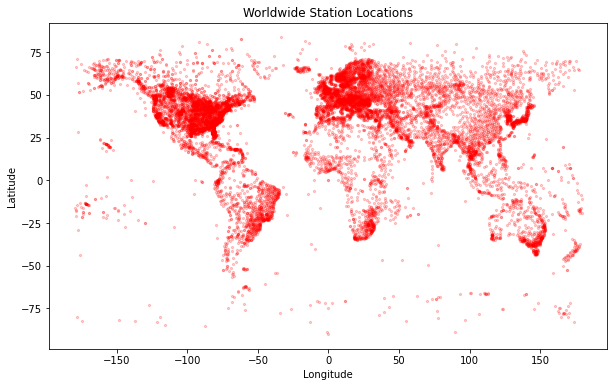

In [21]:
df = cleaned_locations

BBox = ((-180.,180.,-90.,90.))

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df.LONG, df.LAT, zorder = 1, alpha = 0.2, c = 'r', s = 5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#wmp = plt.imread('../Images/map.jpg')
#ax.imshow(wmp, zorder = 0, extent = BBox)
plt.title('Worldwide Station Locations')
plt.show()

## Balance the north and south stations

In [27]:
cleaned_locations_south = cleaned_locations.loc[cleaned_locations.LAT <= 0,:]
cleaned_locations_north = cleaned_locations.loc[cleaned_locations.LAT > 0,:]

In [28]:
sampled_north = cleaned_locations_north.sample(int(cleaned_locations_south.shape[0]*0.35))
indices = sampled_north.index.append(cleaned_locations_south.index)

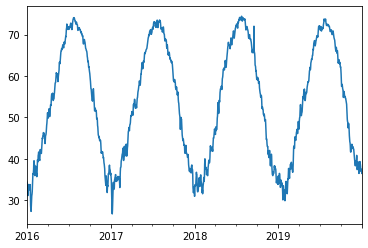

In [29]:
year_aggregated_data.loc[:,sampled_north.index].mean(axis = 1).plot()

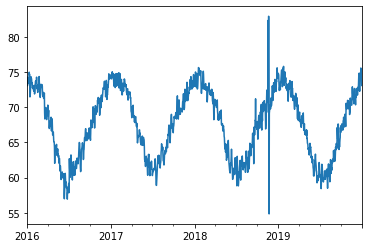

In [30]:
year_aggregated_data.loc[:,cleaned_locations_south.index].mean(axis = 1).plot()

Text(0, 0.5, 'Temperature')

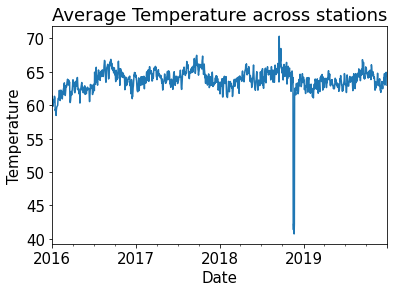

In [93]:
year_aggregated_data.loc[:, indices].mean(axis = 1).plot()
plt.title('Average Temperature across stations')
plt.xlabel('Date')
plt.ylabel('Temperature')

## Remove majority of station observations

In [27]:
cleaned_aggregated_data = year_aggregated_data.loc[:, indices]
cleaned_locations = cleaned_locations.loc[indices,:]
cleaned_locations_rad = cleaned_locations_rad.loc[indices,:]

In [24]:
cleaned_aggregated_data.head()

,30978099999,08545099999,63332099999,99422099999,07753099999,72258903991,72027612983,72693024221,02944099999,72329003935,...,93441099999,93479099999,93562099999,93721099999,93738099999,93792099999,93796099999,93887099999,94663099999,95674099999
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


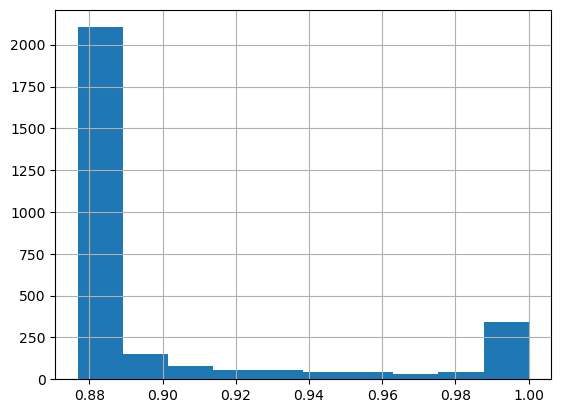

In [27]:
cleaned_aggregated_data.isna().mean(axis = 0).hist()

In [29]:
# for each column, pick a random contiguous subset of the data to keep, of size 1/4. Set everything else to zero.
L = 90 # taken to be 365 before
for col in cleaned_aggregated_data.columns:
    masked_col = cleaned_aggregated_data[col]
    i = np.random.randint(0,1461 - L)
    masked_col[:i] = np.nan
    masked_col[(i+L):] = np.nan
    cleaned_aggregated_data[col] = masked_col

In [30]:
### save data
#cleaned_aggregated_data.to_pickle('../data/NOAA_aggregated_temp_data_perturbed.pkl')
#cleaned_locations_rad.to_pickle('../data/NOAA_aggregated_locations_radians_perturbed.pkl')
#cleaned_locations.to_pickle('../data/NOAA_aggregated_locations_perturbed.pkl')

## Sliding window analysis

In [32]:
import pandas as pd
import numpy as np
cleaned_aggregated_data = pd.read_pickle('../data/NOAA_aggregated_temp_data_perturbed.pkl')
cleaned_locations_rad = pd.read_pickle('../data/NOAA_aggregated_locations_radians_perturbed.pkl')
cleaned_locations = pd.read_pickle('../data/NOAA_aggregated_locations_perturbed.pkl')

In [32]:
from haversine import haversine_vector, Unit

# create list of node weights, list of edge weights, 
node_wts = []
edge_wts = []

# iterate over the rows of the aggregated data.
for time, row in cleaned_aggregated_data.iterrows():
    
    # get nonzero station numbers
    nodes = row[~np.isnan(row)]
    node_locations = cleaned_locations.loc[nodes.index.astype(str),:]
    
    ## convert this to distances between nodes
    dists = haversine_vector(node_locations.values, node_locations.values, comb = True)
    
    N = len(dists)
    radius = 6371. ## radius of the earth.
    threshold = np.sqrt((np.log(N)+8)/(np.pi*N))*radius
    
    ## convert these distances to filtration birthtimes
    filt_birthtimes = np.where(dists < threshold, -np.inf, np.inf)
    
    node_wts.append(nodes)
    edge_wts.append(filt_birthtimes)
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


In [33]:
import pickle

In [34]:
with open('node_wts_perturbed.pkl', 'wb') as f:
    pickle.dump(node_wts, f) 
    
with open('edge_wts_perturbed.pkl', 'wb') as f:
    pickle.dump(edge_wts, f) 

In [1]:
import pickle
with open('node_wts_perturbed.pkl', 'rb') as f:
    node_wts = pickle.load(f) 
    
with open('edge_wts_perturbed.pkl', 'rb') as f:
    edge_wts = pickle.load(f) 


In [34]:
from __future__ import division
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import squareform
import importlib
import scipy.spatial as sp

## Load in sphere code
sys.path.append('../../data/simple_egs/')
import PlaneExample as plane
importlib.reload(plane)

## Load in d.n. analysis code
sys.path.append('../../src/')
import graph_fns as gf
import persistence_fns as pf
import sliding_window_fns as sw
from ripser import ripser
from persim import plot_diagrams
from sklearn import manifold

from matplotlib.lines import Line2D
import time 

importlib.reload(pf)

<module 'persistence_fns' from '../../src/persistence_fns.py'>

In [3]:
from scipy import sparse
edge_wts = [sparse.coo_matrix(x) for x in edge_wts]
node_wts = [x.values for x in node_wts]
print(len(edge_wts))
print(len(node_wts))

1461
1461


In [4]:
import multiprocessing as mp
from joblib import Parallel, delayed
from scipy import sparse

## why is this taking so long?
start = time.time()
filtration_matrix = list(map(lambda n, e: pf.get_filtration(n, e), node_wts, edge_wts))
end = time.time()
print("Converting to filtration matrices", end - start) 

Converting to filtration matrices 2.4388318061828613


In [5]:
start = time.time()
num_cores = mp.cpu_count() - 4
barcodes = Parallel(n_jobs = num_cores)(delayed(pf.get_rips_complex)(filt) for filt in filtration_matrix)
end = time.time()
print("Computing barcodes", end - start) 

Computing barcodes 9.944701910018921


In [2]:
#save the diagrams!
import pickle
#with open('dgms.pkl', 'wb') as f:
#    pickle.dump(barcodes, f) 

with open('dgms.pkl', 'rb') as f:
    barcodes = pickle.load(f) 

In [7]:
#what do the diagrams look like?

In [8]:
start = time.time()
bn_dist_matrix = pf.get_bottleneck_dist_matrix(barcodes) ### also look at the Wasserstein distances
end = time.time()

### might also want to parallelize this.
print("Computing bottleneck", end - start) 

Computing Row 0
Computing Row 1
Computing Row 2
Computing Row 3
Computing Row 4
Computing Row 5
Computing Row 6
Computing Row 7
Computing Row 8
Computing Row 9
Computing Row 10
Computing Row 11
Computing Row 12
Computing Row 13
Computing Row 14
Computing Row 15
Computing Row 16
Computing Row 17
Computing Row 18
Computing Row 19
Computing Row 20
Computing Row 21
Computing Row 22
Computing Row 23
Computing Row 24
Computing Row 25
Computing Row 26
Computing Row 27
Computing Row 28
Computing Row 29
Computing Row 30
Computing Row 31
Computing Row 32
Computing Row 33
Computing Row 34
Computing Row 35
Computing Row 36
Computing Row 37
Computing Row 38
Computing Row 39
Computing Row 40
Computing Row 41
Computing Row 42
Computing Row 43
Computing Row 44
Computing Row 45
Computing Row 46
Computing Row 47
Computing Row 48
Computing Row 49
Computing Row 50
Computing Row 51
Computing Row 52
Computing Row 53
Computing Row 54
Computing Row 55
Computing Row 56
Computing Row 57
Computing Row 58
Computi

Computing Row 463
Computing Row 464
Computing Row 465
Computing Row 466
Computing Row 467
Computing Row 468
Computing Row 469
Computing Row 470
Computing Row 471
Computing Row 472
Computing Row 473
Computing Row 474
Computing Row 475
Computing Row 476
Computing Row 477
Computing Row 478
Computing Row 479
Computing Row 480
Computing Row 481
Computing Row 482
Computing Row 483
Computing Row 484
Computing Row 485
Computing Row 486
Computing Row 487
Computing Row 488
Computing Row 489
Computing Row 490
Computing Row 491
Computing Row 492
Computing Row 493
Computing Row 494
Computing Row 495
Computing Row 496
Computing Row 497
Computing Row 498
Computing Row 499
Computing Row 500
Computing Row 501
Computing Row 502
Computing Row 503
Computing Row 504
Computing Row 505
Computing Row 506
Computing Row 507
Computing Row 508
Computing Row 509
Computing Row 510
Computing Row 511
Computing Row 512
Computing Row 513
Computing Row 514
Computing Row 515
Computing Row 516
Computing Row 517
Computing 

Computing Row 1365
Computing Row 1366
Computing Row 1367
Computing Row 1368
Computing Row 1369
Computing Row 1370
Computing Row 1371
Computing Row 1372
Computing Row 1373
Computing Row 1374
Computing Row 1375
Computing Row 1376
Computing Row 1377
Computing Row 1378
Computing Row 1379
Computing Row 1380
Computing Row 1381
Computing Row 1382
Computing Row 1383
Computing Row 1384
Computing Row 1385
Computing Row 1386
Computing Row 1387
Computing Row 1388
Computing Row 1389
Computing Row 1390
Computing Row 1391
Computing Row 1392
Computing Row 1393
Computing Row 1394
Computing Row 1395
Computing Row 1396
Computing Row 1397
Computing Row 1398
Computing Row 1399
Computing Row 1400
Computing Row 1401
Computing Row 1402
Computing Row 1403
Computing Row 1404
Computing Row 1405
Computing Row 1406
Computing Row 1407
Computing Row 1408
Computing Row 1409
Computing Row 1410
Computing Row 1411
Computing Row 1412
Computing Row 1413
Computing Row 1414
Computing Row 1415
Computing Row 1416
Computing Ro

In [35]:
#with open('bn_dist_matrix.pkl', 'wb') as f:
#    pickle.dump(bn_dist_matrix, f) 

import pickle
with open('bn_dist_matrix.pkl', 'rb') as f:
    bn_dist_matrix = pickle.load(f) 

In [36]:
# save this computation?

In [37]:
T = 365
wl = 1.0*T
step_size = 1
d = 120
swe = sw.sliding_window(range(bn_dist_matrix.shape[0]), d=d, tau= int(wl/(d*step_size)),
                                    max_index = int(3.0*T/step_size) )

print("Number of points in SW Embedding:", len(swe))
sw_dist_matrix = sw.sw_distance_matrix(swe, bn_dist_matrix)

Number of points in SW Embedding: 1095


In [38]:
PDs = ripser(sw_dist_matrix, distance_matrix=True, maxdim=1, coeff=3)['dgms']
a = PDs[1]
oa = a[(a[:,1] - a[:,0]).argsort()]

In [55]:
cleaned_aggregated_data.mean(axis = 1).min()

37.61176470588236

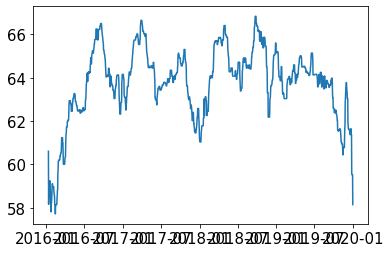

In [61]:
plt.plot(cleaned_aggregated_data.mean(axis = 1).rolling(13).median())

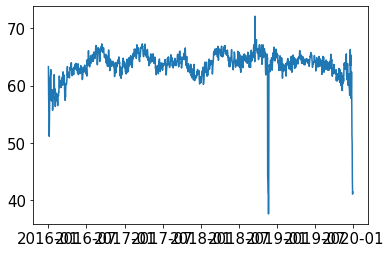

In [63]:
plt.plot(cleaned_aggregated_data.mean(axis = 1))

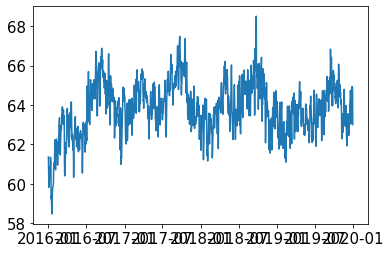

In [94]:
s = year_aggregated_data.loc[:, indices].mean(axis = 1)
s[(s < 55) | (s > 70)] = np.mean(s)
plt.plot(s)

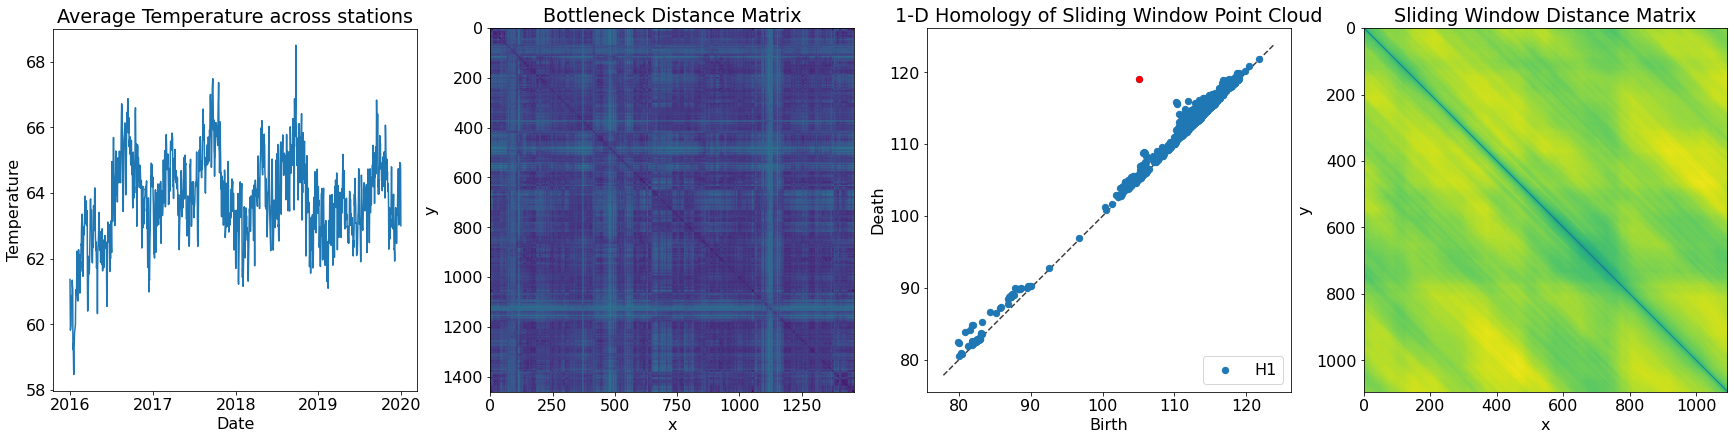

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 16})

fig, (ax1,ax3,ax2,ax4)  = plt.subplots(1, 4, figsize = (30,20),gridspec_kw={'width_ratios': [1,1,1,1]})

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

s.index = pd.DatetimeIndex(s.index)
ax1.plot(s)
ax1.set_title('Average Temperature across stations')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature')
ax1.set_aspect(145)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

ax2.scatter(PDs[1][:,0],PDs[1][:,1],s = 40, label = 'H1')
ax2.set_title('1-D Homology of Sliding Window Point Cloud')
ax2.legend(loc = 4)
ax2.set_aspect('equal','box')
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax2.set_ylabel('Death')
ax2.set_xlabel('Birth')
ax2.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
a = PDs[1]
sa = a[(a[:,1] - a[:,0]).argsort()]
ax2.plot(sa[-1,0],sa[-1,1],'ro', linewidth = 160)

ax3.imshow(bn_dist_matrix)
ax3.set_title('Bottleneck Distance Matrix')
ax3.set_ylabel('y')
ax3.set_xlabel('x')

ax4.imshow(sw_dist_matrix)
ax4.set_title('Sliding Window Distance Matrix')
ax4.set_ylabel('y')
ax4.set_xlabel('x')

plt.savefig('perturbed_noaa_results.png')

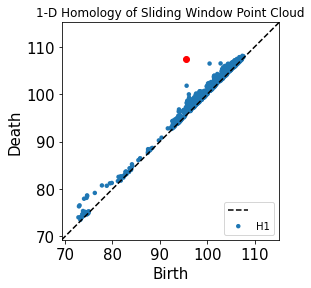

In [16]:
plot_diagrams(PDs[1])
plt.title('1-D Homology of Sliding Window Point Cloud')
plt.legend([None,'H1'], loc = 4)
plt.plot(oa[-1,0],oa[-1,1],'ro')

(1095, 3)


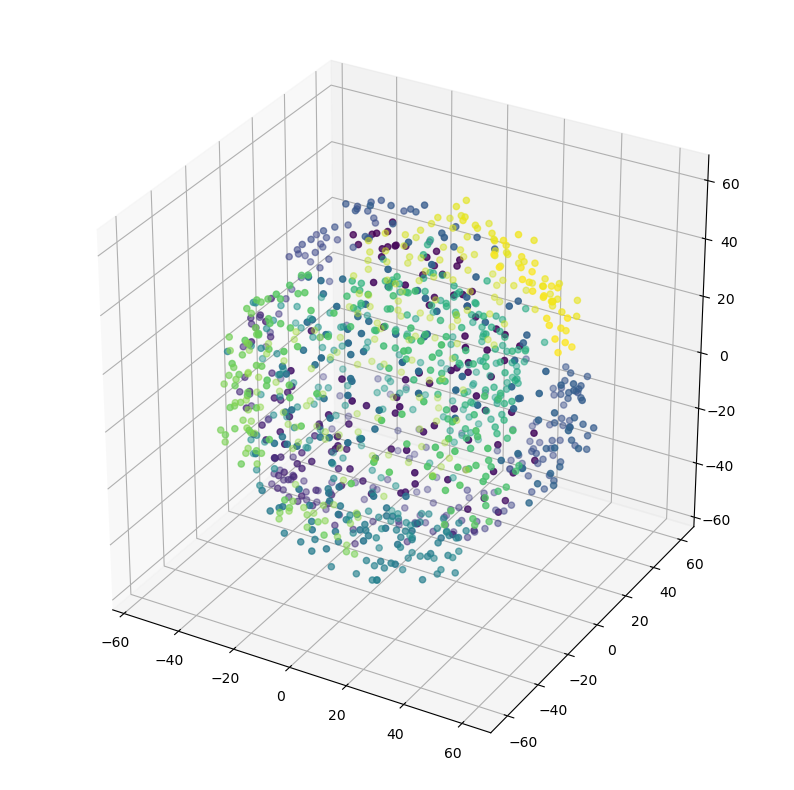

In [16]:
from sklearn.manifold import MDS
embedding = MDS(n_components=3, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(sw_dist_matrix)
print(X_transformed.shape)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],
           c = np.linspace(0,1,X_transformed.shape[0]),
           cmap = plt.cm.viridis)